<img src="ais-logo.png">

# Prueba aptitudes analíticas

En esta prueba se busca evaluar la capacidad de analizar una base de datos, realizar las transformaciones necesarias, generar un modelo predictivo y evaluar su rendimiento. Para esto se usará una base de datos de ofertas inmobiliarias con variables de la propiedad, variables de las zona, y algunas variables de cercanias a colegios y farmacias. La base se encuentra disponible en LINK y contiene las siguientes variables:

* ID_LOCALIDAD:   ID de la división administrativa LOCALIDAD
* ID_DISTRITO:    ID de la división administrativa DISTRITO
* ID_COMUNA:      ID de la división administrativa COMUNA
* lat:            Latitud
* lng:            Longitud
* precio_f:       Precio de oferta de la propiedad
* region:         Región donde se encuentra la propiedad
* tipo:           Tipo de propiedad
* direccion:      Dirección
* descripcion:    Descripción
* sup_total:      Superficie Total
* sup_util:       Superficie Útil
* dormitorios:    Dormitorios
* banos:          Baños
* antiguedad:     Antigüedad
* bodegas:        Bodegas
* min_dist_col:   Distancia mínima a un colegio
* n_col:          Número de colegios a 1 kilometro
* mean_dist_col:  Distancia promedio a los colegios cercanos
* min_dist_farm:  Distancia mínima a una farmacia
* n_farm:         Número de farmacias a 1 kilometro
* mean_dist_farm: Distancia promedio a farmacias cercanas
* RH_PERLLEG4:    % de personas en la zona de la propiedad que si nació en otro país, llegó antes de 1990 
* CNV_MONPAGVIVP: Promedio Monto de pago por concepto de arriendo o dividendo en la zona de la propiedad 
* CNH_INGTOTP:    Promedio del ingreso total del hogar corregido en la zona de la propiedad
* CNRH_INGOCUP:   Promedio del ingreso ocupación principal

El objetivo final será predecir el precio de oferta de la propiedad a partir de el resto de las variables seleccionadas, pudiendose crear más variables si asi lo estiman necesario. 


## 1. Lectura e inspección de base

Primero se deberá leer el archivo y verificar la cantidad de registros, variables y el formato de estas.

In [126]:
options(warn=-1)

In [258]:
#intalling packages
install.packages(c("caret"
                   , "data.table"
                   , "bit64"
                   , "dplyr"
                   , "tidyr"
                   , "ggplot2"
                   , "ggpubr"
                   , "fastDummies"
                   , "MASS"
                   , "xgboost"))

package 'MASS' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Catalina.Villamil\AppData\Local\Temp\RtmpQ1IK9j\downloaded_packages


In [259]:
#packages
library("caret")
library("data.table")
library("bit64")
library("dplyr")
library("tidyr")
library("ggplot2")
library("ggpubr")
library("fastDummies")
library("MASS")
library("xgboost")


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select




In [129]:
datos2 = fread(unzip("base_prueba.zip", "base_prueba.csv")
              , dec="."
              , sep=";"
              , colClasses=list(character= c("ID_LOCALIDAD","ID_DISTRITO","ID_COMUNA")))
datos = datos2

In [130]:
head(datos, 5)

ID_LOCALIDAD,ID_DISTRITO,ID_COMUNA,lat,lng,precio_f,region,tipo,direccion,descripcion,...,min_dist_col,n_col,mean_dist_col,min_dist_farm,n_farm,mean_dist_farm,RH_PERLLEG4,CNV_MONPAGVIVP,CNH_INGTOTP,CNRH_INGOCUP
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,...,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
06101011001,0610101,06101,6217611,339569.0,410000000,bernardo-ohiggins,casa,San Ramon,Nieny Vende hermosa parcela de 5 000 mts2 en Sector San Ram n de Rancagua rodeada de lindos espacios naturales la parcela cuenta con 2 casas en su interior ideal para una familia grande o dos grupos familiares la Primera Casa cuenta con 180 mt2 de construcci n solida Living comedor cocina con muebles sala de estudio 4 dormitorios 2 ba os logia terraza quincho bodegas piscina de 8 x 4 mts y 1 75 de Profundidad La Segunda Casa cuenta con 85 mts2 de construcci n solida 3 habitaciones dos ba os sala de estudio living comedor piso ceramico y flotante El sector San Ram n se encuentra ubicado a tan solo 15 minutos del centro de Rancagua y 5 minutos del Hospital Regional de Rancagua cerca de supermercados y colegios Para conocer esta hermosa propiedad debes agendar visita al 722321321,...,89.87394,10,525.0032,112.9607,10,409.4013,0.002729444,182798.2,1025098.5,588102.8
06101011001,0610101,06101,6217611,339569.2,186657380,bernardo-ohiggins,casa,El Olivar 1 Casa 2,Estupenda casa con lindo jard n piscina quincho y estacionamiento Pieza y ba o de servicio Todas las ventanas y ventanales con Termopanel Seguridad en las ventanas Caracter sticas propiedad pieza de servicio piscina quincho,...,90.24245,10,525.0447,113.3336,10,409.6544,0.002729444,182798.2,1025098.5,588102.8
06101031001,0610103,06101,6217980,338698.3,35000000,bernardo-ohiggins,casa,Altazor 01620,Casa de dos pisos con muy buenas ampliaciones Superficie original de 45 85 m2 ampliada en 51 89 m2 lo que arroja un total construido de 97 7 m2 todo regularizado en la Municipalidad de Rancagua,...,621.68336,5,771.8299,112.9308,10,575.7186,0.004479283,158218.4,759789.8,373339.8
06101031001,0610103,06101,6217980,338698.3,55000000,bernardo-ohiggins,casa,El Arado 1518,EXCELENTE OPORTUNIDAD DE INVERSI NHermosa propiedad en ofertaCaracter sticas Totalmente cercada parte frontal con reja met lica Living Comedor 4 Dormitorios2 ba os con ducha Cocina tradicionalEstacionamiento techado con capacidad para dos veh culos Ubicaci n estrat gica zona Norte de Rancagua a 10 minutos del centro de la ciudad locomoci n cercana a la propiedad Precio 55 000 000 mas 1 5 mas de honorarios por corretaje mas impuestos Para m s inf 56 964187327Yoanna SerranoTerminaciones Piso ba os cer micaPiso dormitorios baldos n cer mico,...,621.68336,5,771.8299,112.9308,10,575.7186,0.004479283,158218.4,759789.8,373339.8
06101031001,0610103,06101,6218012,338690.0,272806940,bernardo-ohiggins,casa,Calle Uni n Obrera Campos,Estupenda casa construcci n completamente s lida Con c modos ambientes y excelentes terminaciones 3 dormitorios 1 en suite m s uno peque o para escritorio si se desea con espacios para incorporar closets 1 2 ba o a parte es decir s lo con ducha Cocina americana campana de acero marca Inox comedor en cocina lavadero tendedero y lugar de planchado juntos Calefacci n a chimenea en living con excelente tiraje Bosca en comedor de diario y gas s per bal n para agua caliente Instalaciones para internet wifi telefon a cable Port n preparado para instalaci n autom tica tiene espacio para 10 veh culos estacionados jard n es una maravilla en pleno verano donde se pueden pasar maravillosos momentos en familia y con amigos Tiene pozo de agua para regar y listo para instalar bomba rboles frutales y terreno suficiente para realizar m s proyectos de jard n Hermosas y c lidas terminaciones en madera en los cielos Muchos ventanales y por posici n de casa tiene una privacidad nica LOS M2 SON APROXIMADOS,...,632.80084,5,787.1883,114.3594,10,619.6868,0.004479283,158218.4,759789.8,373339.8


In [131]:
nrow(datos)
summary(datos)

[1] 37768

 ID_LOCALIDAD       ID_DISTRITO         ID_COMUNA              lat         
 Length:37768       Length:37768       Length:37768       Min.   :6147199  
 Class :character   Class :character   Class :character   1st Qu.:6294421  
 Mode  :character   Mode  :character   Mode  :character   Median :6299105  
                                                          Mean   :6296375  
                                                          3rd Qu.:6303251  
                                                          Max.   :6351016  
                                                                           
      lng            precio_f            region              tipo          
 Min.   :221638   Min.   :        1   Length:37768       Length:37768      
 1st Qu.:345844   1st Qu.:108959395   Class :character   Class :character  
 Median :351059   Median :200441310   Mode  :character   Mode  :character  
 Mean   :348567   Mean   :215807273                                        
 3rd Qu.:354

In [132]:
unique(datos$tipo)
unique(datos$region)
unique(datos$ID_COMUNA)

[1] "casa" "depa"

[1] "bernardo-ohiggins" "RM"

[1] "06101" "06102" "06103" "06104" "06105" "06106" "06107" "06108" "06109"
[10] "06110" "06111" "06113" "06114" "06115" "06116" "06117" "06201" "06202"
[19] "06203" "06204" "06205" "06301" "06302" "06303" "06304" "06305" "06306"
[28] "06307" "06308" "06310" "13101" "13102" "13103" "13104" "13105" "13106"
[37] "13107" "13108" "13109" "13110" "13111" "13112" "13113" "13114" "13115"
[46] "13116" "13117" "13118" "13119" "13120" "13121" "13122" "13123" "13124"
[55] "13125" "13126" "13127" "13128" "13129" "13130" "13131" "13132" "13201"
[64] "13202" "13203" "13301" "13302" "13303" "13401" "13402" "13403" "13404"
[73] "13501" "13502" "13503" "13504" "13505" "13601" "13602" "13603" "13604"
[82] "13605"

### Variables

Variable de interes:
* **precio_f**:       Precio de oferta de la propiedad

Caracteristicas numericas no categoricas:
* **lat**:            Latitud
* **lng**:            Longitud
* **sup_total**:      Superficie Total
* **sup_util**:       Superficie Útil
* **antiguedad**:     Antigüedad
* **min_dist_col**:   Distancia mínima a un colegio
* **mean_dist_col**:  Distancia promedio a los colegios cercanos
* **min_dist_farm**:  Distancia mínima a una farmacia
* **mean_dist_farm**: Distancia promedio a farmacias cercanas
* **RH_PERLLEG4**:    % de personas en la zona de la propiedad que si nació en otro país, llegó antes de 1990 
* **CNV_MONPAGVIVP**: Promedio Monto de pago por concepto de arriendo o dividendo en la zona de la propiedad 
* **CNH_INGTOTP**:    Promedio del ingreso total del hogar corregido en la zona de la propiedad
* **CNRH_INGOCUP**:   Promedio del ingreso ocupación principal

Catacteristicas categoricas numericas:
* **dormitorios**:    Dormitorios
* **banos**:          Baños
* **bodegas**:        Bodegas
* **n_col**:          Número de colegios a 1 kilometro
* **n_farm**:         Número de farmacias a 1 kilometro



Caracteristicas categoricas no numericas: 

* **ID_LOCALIDAD**:   ID de la división administrativa LOCALIDAD
* **ID_DISTRITO**:    ID de la división administrativa DISTRITO
* **ID_COMUNA**:      ID de la división administrativa COMUNA
* **region**:         Región donde se encuentra la propiedad
* **tipo**:           Tipo de propiedad
* **direccion**:      Dirección
* **descripcion**:    Descripción









### Transformación de variables

In [133]:
datos = datos  %>% 
    mutate(antiguedad = ifelse(antiguedad > 2020,NA,ifelse(antiguedad>1000,2020-antiguedad,antiguedad)))

## 2. Análisis descriptivo

Realizar el análisis descriptivo que estimen pertinente de acuerdo al problema descrito. Este debe ayudarles a tomar algunas decisiones sobre que variables servirán, cuales hay que transformar, registros a omitir, etc. Jumbitos extra a visualizaciones útiles e interesantes.

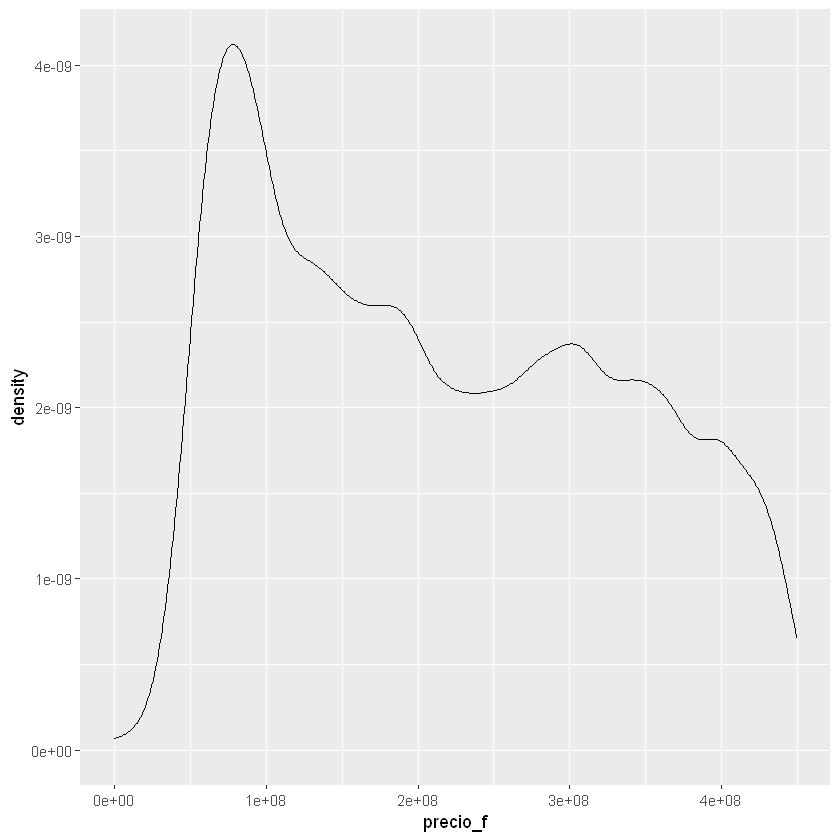

In [134]:
g = ggplot(datos, aes(x=precio_f)) + 
  geom_density()
g

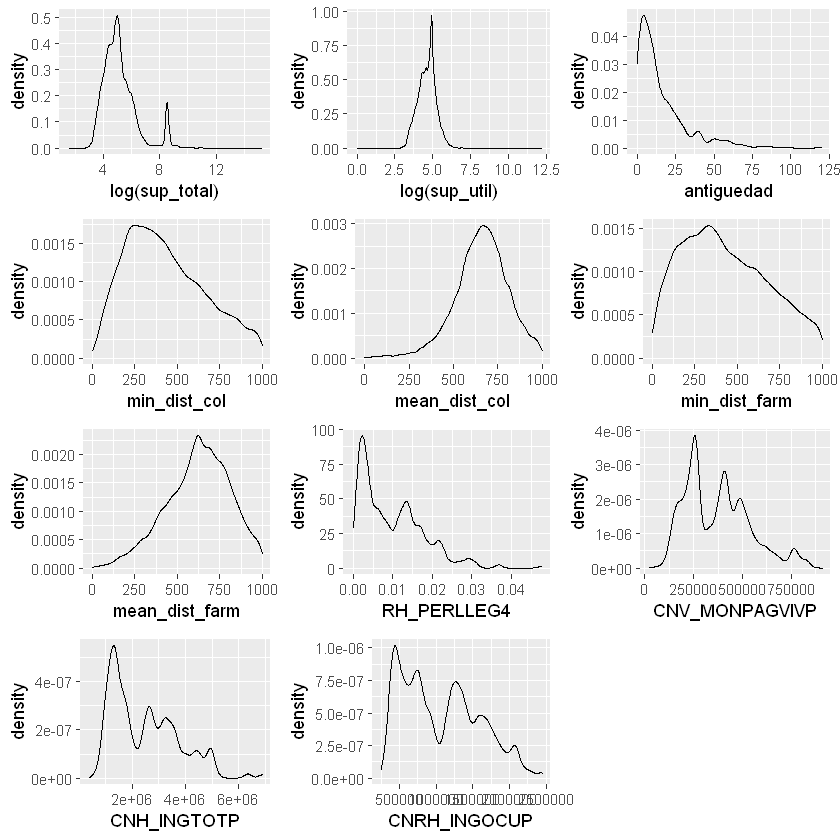

In [135]:
g1 = ggplot(datos, aes(x=log(sup_total) )) +  geom_density()
g2 = ggplot(datos, aes(x=log(sup_util))) +  geom_density()
g5 = ggplot(datos, aes(x=antiguedad )) +  geom_density()
g7 = ggplot(datos, aes(x=min_dist_col )) +  geom_density()
g9 = ggplot(datos, aes(x=mean_dist_col )) +  geom_density()
g10 = ggplot(datos, aes(x=min_dist_farm )) +  geom_density()
g12 = ggplot(datos, aes(x=mean_dist_farm )) +  geom_density()
g13 = ggplot(datos, aes(x=RH_PERLLEG4 )) +  geom_density()
g14 = ggplot(datos, aes(x=CNV_MONPAGVIVP )) +  geom_density()
g15 = ggplot(datos, aes(x=CNH_INGTOTP )) +  geom_density()
g16 = ggplot(datos, aes(x=CNRH_INGOCUP )) +  geom_density()

ggarrange(g1,g2,g5,g7,g9,g10,g12,g13,g14,g15,g16,                                                
          ncol = 3 ,nrow= 4
          , heights= c(2,2,2,2)
          ) 

Debido a la distribución de los datos de superficies, es mejor aplicarles una transformación de logaritmo para poder observar y analizar de una mejor manera el comportamiento de los datos y su relación con las demas variables.

Visualicemos la relación entre las variables y los precios de la vivienda a través de diagramas de dispersión 2D, comenzando con las características numéricas no categóricas:

$`1`

$`2`

attr(,"class")
[1] "list"      "ggarrange"

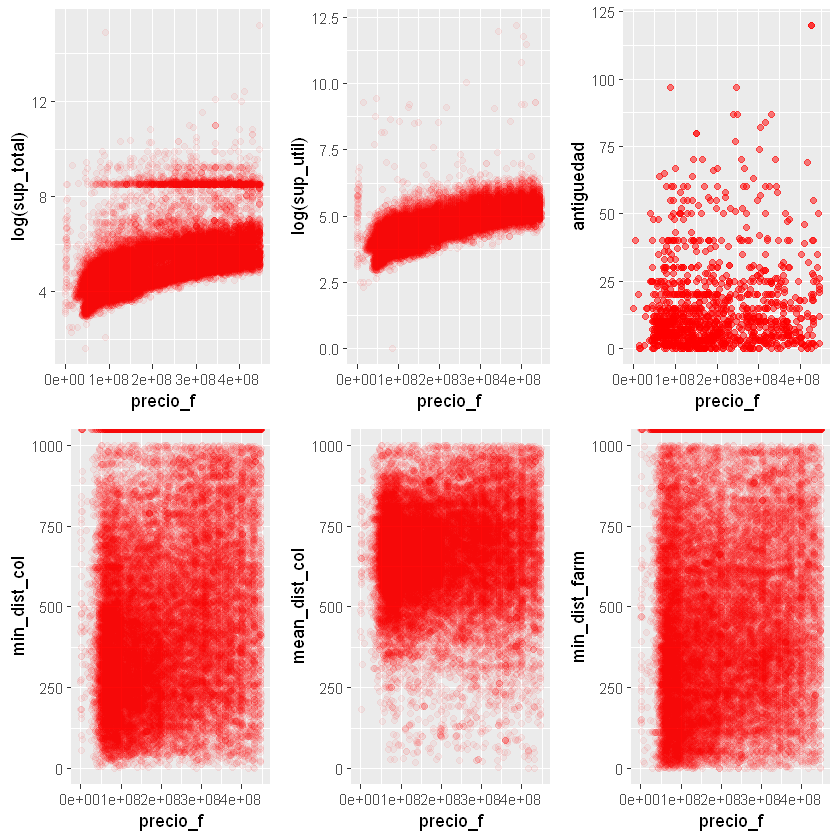

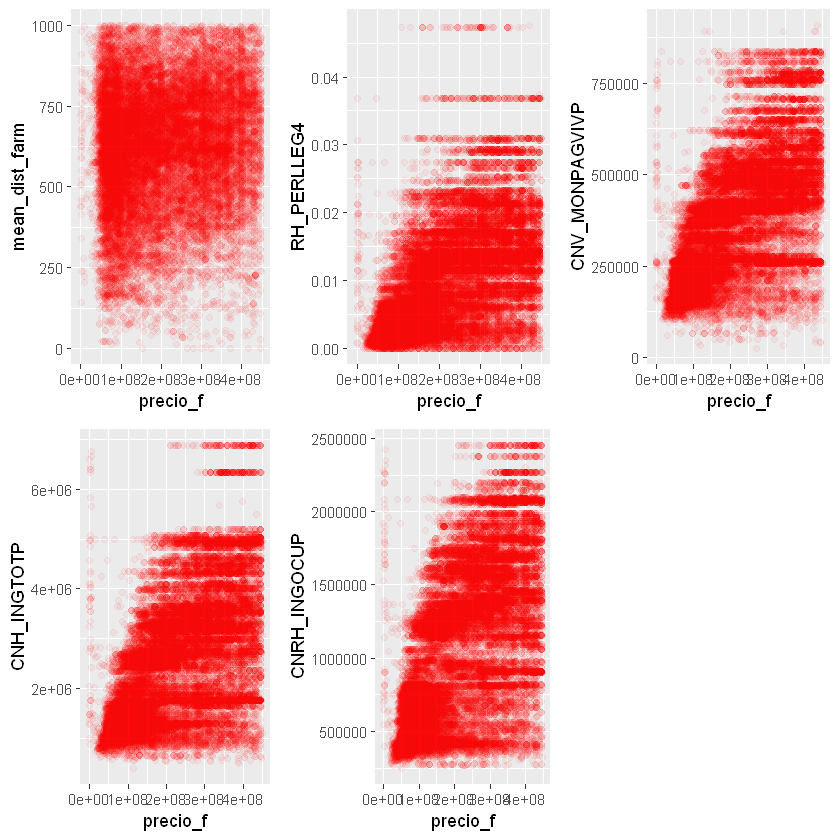

In [136]:
g1 = ggplot(datos, aes(x=precio_f, y=log(sup_total) )) + geom_point(alpha= 0.05,color="red")
g2 = ggplot(datos, aes(x=precio_f, y=log(sup_util))) + geom_point(alpha= 0.05,color="red")
g5 = ggplot(datos, aes(x=precio_f, y=antiguedad )) + geom_point(alpha= 0.5,color="red")
g7 = ggplot(datos, aes(x=precio_f, y=min_dist_col )) + geom_point(alpha= 0.05,color="red")
g9 = ggplot(datos, aes(x=precio_f, y=mean_dist_col )) + geom_point(alpha= 0.05,color="red")
g10 = ggplot(datos, aes(x=precio_f, y=min_dist_farm )) + geom_point(alpha= 0.05,color="red")
g12 = ggplot(datos, aes(x=precio_f, y=mean_dist_farm )) + geom_point(alpha= 0.05,color="red")
g13 = ggplot(datos, aes(x=precio_f, y=RH_PERLLEG4 )) + geom_point(alpha= 0.05,color="red")
g14 = ggplot(datos, aes(x=precio_f, y=CNV_MONPAGVIVP )) + geom_point(alpha= 0.05,color="red")
g15 = ggplot(datos, aes(x=precio_f, y=CNH_INGTOTP )) + geom_point(alpha= 0.05,color="red")
g16 = ggplot(datos, aes(x=precio_f, y=CNRH_INGOCUP )) + geom_point(alpha= 0.05,color="red")

ggarrange(g1,g2,g5,g7,g9,g10,g12,g13,g14,g15,g16,                                                
          ncol = 3 , nrow= 2
          ) 

Algunas observaciones son evidentes. Primero, la Superficie Total, la Superficie Útil, el % de personas en la zona de la propiedad que si nació en otro país, llegó antes de 1990, el promedio Monto de pago por concepto de arriendo o dividendo en la zona de la propiedad, el promedio del ingreso total del hogar corregido en la zona de la propiedad y el promedio del ingreso ocupación principal se correlacionan positivamente con los precios de la vivienda. Sin embargo, no parece haber una relación sólida entre el precio y las demas variables.

Veamos las características categóricas numéricas para ver si podemos notar algún patrón significativo:

$`1`

$`2`

attr(,"class")
[1] "list"      "ggarrange"

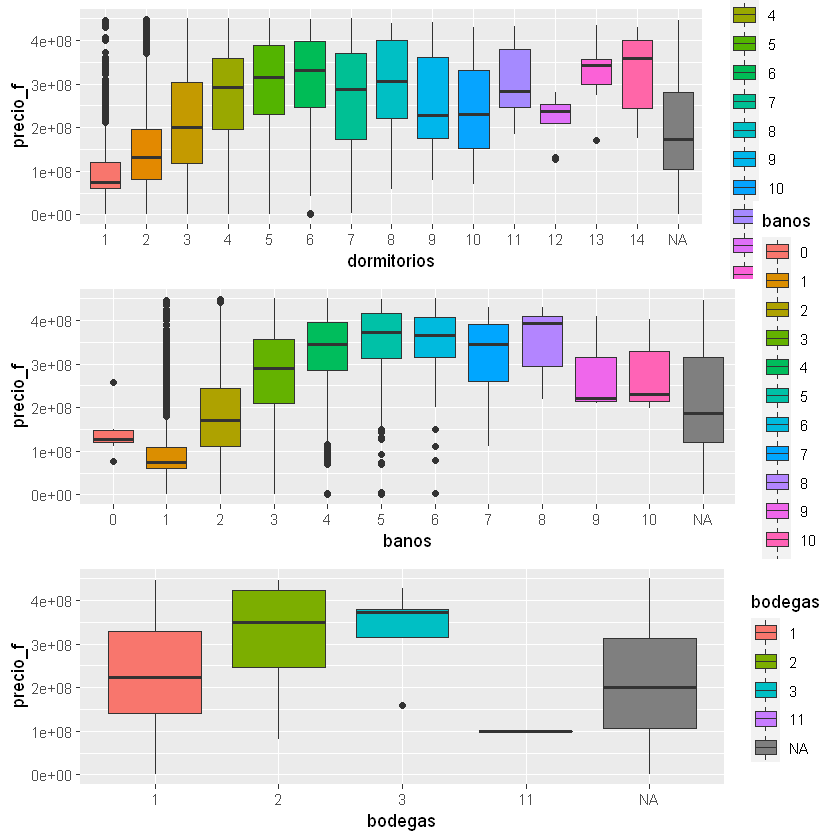

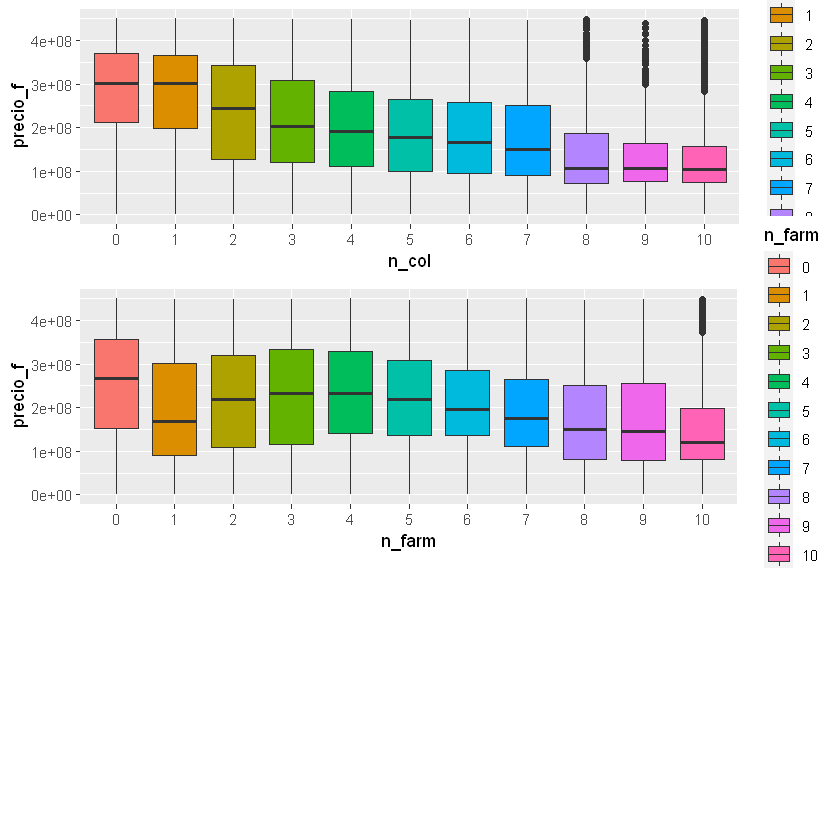

In [137]:
datosp=datos  %>%
    select(dormitorios,banos,bodegas,n_col,n_farm, precio_f) %>% 
    mutate(dormitorios=as.factor(dormitorios),
           banos=as.factor(banos),
           bodegas=as.factor(bodegas),
           n_col=as.factor(n_col),
           n_farm=as.factor(n_farm))
g1 = ggplot(datosp, aes(x=dormitorios, y=precio_f, fill=dormitorios)) + geom_boxplot()
g2 = ggplot(datosp, aes(x=banos, y=precio_f, fill=banos)) + geom_boxplot()
g3 = ggplot(datosp, aes(x=bodegas, y=precio_f, fill=bodegas)) + geom_boxplot()
g4 = ggplot(datosp, aes(x=n_col, y=precio_f, fill=n_col)) + geom_boxplot()
g5 = ggplot(datosp, aes(x=n_farm, y=precio_f, fill=n_farm)) + geom_boxplot()

ggarrange(g1,g2,g3, g4,g5,                                                
          ncol = 1, nrow=3
          ) 

Inmediatamente notamos la fuerte relación que tienen los dormitorios, los baños y las bodegas con los precios de las viviendas. Esto se espera ya que las casas más grandes, naturalmente, tienen más habitaciones y exigen un precio de venta más alto. Se tiene, ademas, que a partir de cierto puntos estas caracteristicas tienden a estabilizarse, por ejemplo, a partir de 6 dormitorios y de 5 baños. Por otro lado, el numero de colegios y el numero de farmacias parece tener una relación inversa con el precio de la vivienda.

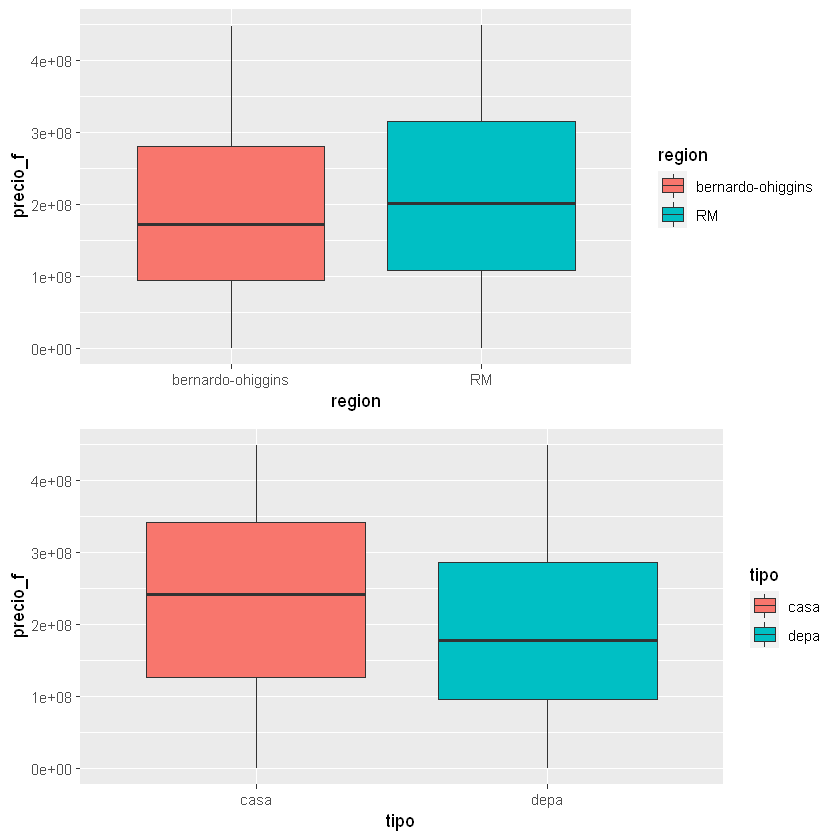

In [138]:
g4 = ggplot(datos, aes(x=region, y=precio_f, fill=region   )) + geom_boxplot()
g5 = ggplot(datos, aes(x=tipo, y=precio_f, fill=tipo )) + geom_boxplot()

ggarrange( g4,g5,                                                
          ncol = 1
          ) 
 

Como era de esperarse, en una propiedad en la Region Metropolitana, se presentan precios más altos. Ademas, las casas tienen un precio mas alto que los departamentos.

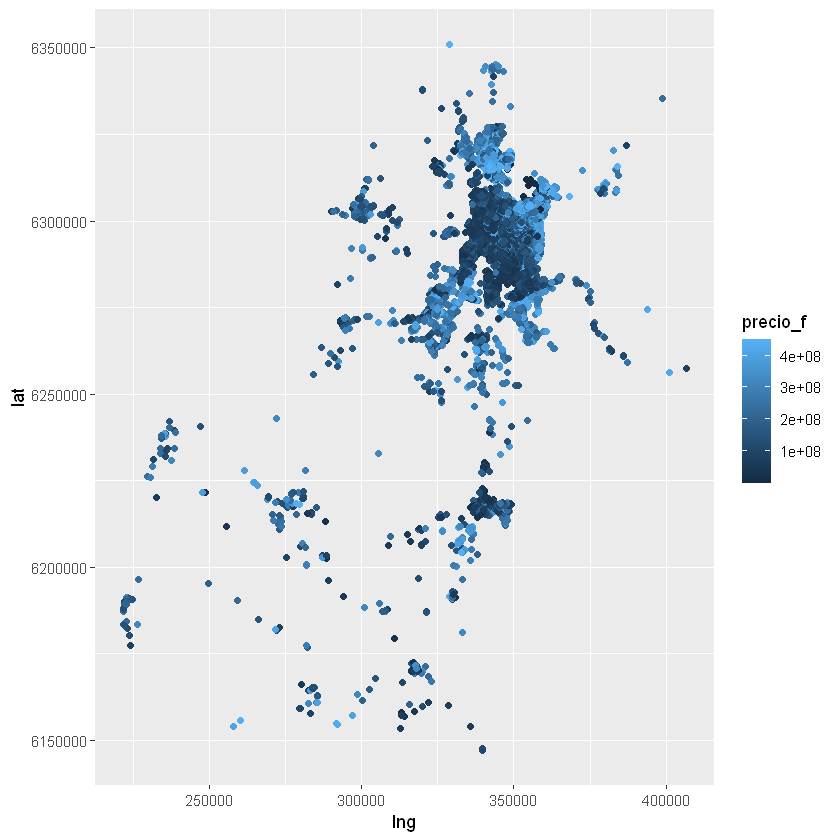

In [139]:
datosp=datos  %>% 
    select(lat, lng, precio_f)
ggplot(datosp, aes(x=lng, y=lat,color=precio_f)) + 
  geom_point()

En este caso se observa que si existen grupos donde se concentran los precios mas altos de las viviendas, sin embargo, no tienen un patron o una relación directa con respecto a la latitud y a la longitud, es decir, estas variables no tienen una relación lineal directa con el precio, aunque la ubicación si juega un papel importante con respecto al precio, en este caso, se podría decir que la división de comunas o distritos podría generar un gran valor con respecto a la predicción.

### Transformación de los datos

Con fines de obtener mejores resultados en el modelo, se realizan otras transformaciones (volver dummies las variables categoricas, aplicarles logaritmo a las superficies para poder trabajar mejor con ellas, modificar la variable del numero de bodegas asumiendo que NA es que tiene 0 bodegas y 11 fue un error de escritura a la hora de ingresar los datos, asi que se podría saltar el dato para evitar sesgos), ademas, se eliminaran las variables que no se tendran en cuenta para la construcción del modelo, en este caso, la variable de antiguedad tiene demasiados datos faltantes, por lo tanto es mejor no tenerla en cuenta, asi como las variables de direccion, ni descricion, tampoco las de localidad y distrito, debido a que tienen muchas categorias, por lo tanto en este caso se trabajara solo con la division de comunas. Finalmente, se eliminaran las filas que contengan algun dato faltante.

In [181]:
table(datos$bodegas)


   1    2    3   11 
1405   30    5    1 

In [250]:
datos3 = datos  %>% 
    select(-c(ID_LOCALIDAD,ID_DISTRITO,direccion,descripcion,antiguedad)) %>% 
    mutate(log_sup_total=log(sup_total)
           , log_sup_util=log(sup_util)
           , bodegas= replace_na(0))  %>% 
    filter(bodegas!=11) %>% 
    drop_na()%>% 
    dummy_cols(remove_first_dummy = TRUE) %>% 
    select(-c(ID_COMUNA,region,tipo)) 
    


In [251]:
head(datos3)

lat,lng,precio_f,sup_total,sup_util,dormitorios,banos,bodegas,min_dist_col,n_col,...,ID_COMUNA_13501,ID_COMUNA_13503,ID_COMUNA_13504,ID_COMUNA_13601,ID_COMUNA_13602,ID_COMUNA_13603,ID_COMUNA_13604,ID_COMUNA_13605,region_RM,tipo_depa
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
6217611,339569.0,410000000,5000,180,4,2,0,89.87394,10,...,0,0,0,0,0,0,0,0,0,0
6217611,339569.2,186657380,3850,260,4,3,0,90.24245,10,...,0,0,0,0,0,0,0,0,0,0
6217980,338698.3,35000000,120,98,3,1,0,621.68336,5,...,0,0,0,0,0,0,0,0,0,0
6217980,338698.3,55000000,110,100,4,2,0,621.68336,5,...,0,0,0,0,0,0,0,0,0,0
6218012,338690.0,272806940,1100,169,4,2,0,632.80084,5,...,0,0,0,0,0,0,0,0,0,0
6217980,338698.3,60000000,130,100,3,2,0,621.68336,5,...,0,0,0,0,0,0,0,0,0,0


In [263]:
nrow(datos3)
summary(datos3)

[1] 27114

      lat               lng            precio_f           sup_total      
 Min.   :6157304   Min.   :223733   Min.   :        1   Min.   :      8  
 1st Qu.:6296637   1st Qu.:346607   1st Qu.: 97557197   1st Qu.:     69  
 Median :6299042   Median :351339   Median :178042424   Median :    115  
 Mean   :6297471   Mean   :349931   Mean   :199065596   Mean   :    477  
 3rd Qu.:6302035   3rd Qu.:354190   3rd Qu.:289613283   3rd Qu.:    180  
 Max.   :6337911   Max.   :374340   Max.   :449413538   Max.   :4000000  
    sup_util         dormitorios         banos           bodegas 
 Min.   :    17.0   Min.   : 1.000   Min.   : 0.000   Min.   :0  
 1st Qu.:    61.0   1st Qu.: 2.000   1st Qu.: 2.000   1st Qu.:0  
 Median :    91.0   Median : 3.000   Median : 2.000   Median :0  
 Mean   :   118.4   Mean   : 2.934   Mean   : 2.186   Mean   :0  
 3rd Qu.:   134.0   3rd Qu.: 4.000   3rd Qu.: 3.000   3rd Qu.:0  
 Max.   :160000.0   Max.   :14.000   Max.   :10.000   Max.   :0  
  min_dist_col      

## 3. Definición muestra

Definir de acuerdo lo inspeccionado anteriormente cual será su muestra final posterior a los filtros pertinentes y a su estrategia de validación que utilizarán para el modelo a estimar. Argumentar las decisiones tomadas en este punto.

In [264]:
set.seed(30)
trainIndex = createDataPartition(datos3$precio_f, p = .7,
                                  list = FALSE,
                                  times = 1)
Train = datos3[ trainIndex,]
Test = datos3[-trainIndex,]

In [265]:
Train_x=data.matrix(Train[,-3])
Train_y=data.matrix(Train[,3])

Test_x=data.matrix(Test[,-3])
Test_y=data.matrix(Test[,3])


In [266]:
xgb_train = xgb.DMatrix(data = Train_x, label = Train_y)
xgb_test = xgb.DMatrix(data = Test_x, label = Test_y)

En este caso 

## 4. Estimación de modelo

Elección de la metodología de modelamiento y su razón. Estimar el modelo 

### Regresión linear

In [260]:
todas=colnames(datos3[,-3])
formula_todas <- as.formula(paste("precio_f" ,paste(todas, collapse=" + "), sep=" ~ "))


In [261]:
formula_todas

precio_f ~ lat + lng + sup_total + sup_util + dormitorios + banos + 
    bodegas + min_dist_col + n_col + mean_dist_col + min_dist_farm + 
    n_farm + mean_dist_farm + RH_PERLLEG4 + CNV_MONPAGVIVP + 
    CNH_INGTOTP + CNRH_INGOCUP + log_sup_total + log_sup_util + 
    ID_COMUNA_06102 + ID_COMUNA_06105 + ID_COMUNA_06106 + ID_COMUNA_06107 + 
    ID_COMUNA_06108 + ID_COMUNA_06110 + ID_COMUNA_06115 + ID_COMUNA_06116 + 
    ID_COMUNA_06201 + ID_COMUNA_06203 + ID_COMUNA_06204 + ID_COMUNA_06205 + 
    ID_COMUNA_06301 + ID_COMUNA_06303 + ID_COMUNA_06305 + ID_COMUNA_06307 + 
    ID_COMUNA_06310 + ID_COMUNA_13101 + ID_COMUNA_13102 + ID_COMUNA_13103 + 
    ID_COMUNA_13104 + ID_COMUNA_13105 + ID_COMUNA_13106 + ID_COMUNA_13107 + 
    ID_COMUNA_13108 + ID_COMUNA_13109 + ID_COMUNA_13110 + ID_COMUNA_13111 + 
    ID_COMUNA_13112 + ID_COMUNA_13113 + ID_COMUNA_13114 + ID_COMUNA_13115 + 
    ID_COMUNA_13116 + ID_COMUNA_13117 + ID_COMUNA_13118 + ID_COMUNA_13119 + 
    ID_COMUNA_13120 + ID_COMUNA_13121 + I

In [267]:
reg = lm(formula_todas, data=Train)  
print(reg)


Call:
lm(formula = formula_todas, data = Train)

Coefficients:
    (Intercept)              lat              lng        sup_total  
     -9.352e+09        1.356e+03        1.325e+03       -1.216e+02  
       sup_util      dormitorios            banos          bodegas  
     -4.940e+03       -3.009e+06        1.696e+07               NA  
   min_dist_col            n_col    mean_dist_col    min_dist_farm  
     -1.181e+03       -5.665e+04        1.137e+04        2.200e+03  
         n_farm   mean_dist_farm      RH_PERLLEG4   CNV_MONPAGVIVP  
      6.472e+05        6.236e+03        1.117e+09       -8.112e+01  
    CNH_INGTOTP     CNRH_INGOCUP    log_sup_total     log_sup_util  
      1.333e+01        2.894e+01        6.182e+07        4.264e+07  
ID_COMUNA_06102  ID_COMUNA_06105  ID_COMUNA_06106  ID_COMUNA_06107  
             NA        3.195e+07       -5.854e+07        1.977e+07  
ID_COMUNA_06108  ID_COMUNA_06110  ID_COMUNA_06115  ID_COMUNA_06116  
     -4.536e+07       -1.255e+08       

In [268]:
step.model <- stepAIC(reg, direction = "both")
summary(step.model)


Call:
lm(formula = precio_f ~ lat + lng + sup_total + sup_util + dormitorios + 
    banos + mean_dist_col + n_farm + mean_dist_farm + RH_PERLLEG4 + 
    CNV_MONPAGVIVP + CNH_INGTOTP + CNRH_INGOCUP + log_sup_total + 
    log_sup_util + ID_COMUNA_06106 + ID_COMUNA_06108 + ID_COMUNA_06110 + 
    ID_COMUNA_06115 + ID_COMUNA_06201 + ID_COMUNA_06205 + ID_COMUNA_06301 + 
    ID_COMUNA_06303 + ID_COMUNA_06305 + ID_COMUNA_13101 + ID_COMUNA_13102 + 
    ID_COMUNA_13103 + ID_COMUNA_13104 + ID_COMUNA_13105 + ID_COMUNA_13106 + 
    ID_COMUNA_13107 + ID_COMUNA_13108 + ID_COMUNA_13109 + ID_COMUNA_13110 + 
    ID_COMUNA_13111 + ID_COMUNA_13112 + ID_COMUNA_13113 + ID_COMUNA_13114 + 
    ID_COMUNA_13116 + ID_COMUNA_13117 + ID_COMUNA_13118 + ID_COMUNA_13119 + 
    ID_COMUNA_13120 + ID_COMUNA_13121 + ID_COMUNA_13122 + ID_COMUNA_13123 + 
    ID_COMUNA_13124 + ID_COMUNA_13125 + ID_COMUNA_13126 + ID_COMUNA_13127 + 
    ID_COMUNA_13128 + ID_COMUNA_13129 + ID_COMUNA_13130 + ID_COMUNA_13131 + 
    ID_COMUNA_13

### xgBoost

In [246]:
watchlist <- list(train=xgb_train, test=xgb_test)

bst <- xgb.train(data=xgb_train,
                 watchlist=watchlist,
               eta = 0.4,
               max_depth = 50, 
               nround=150, 
               subsample = 0.7,
               colsample_bytree = 0.8,
               seed = 42,
               nthread = 4)


[1]	train-rmse:141599920.000000	test-rmse:141540544.000000 
[2]	train-rmse:89483776.000000	test-rmse:90366744.000000 
[3]	train-rmse:59055952.000000	test-rmse:62408852.000000 
[4]	train-rmse:40743420.000000	test-rmse:47741608.000000 
[5]	train-rmse:29357214.000000	test-rmse:40537600.000000 
[6]	train-rmse:22243770.000000	test-rmse:37192240.000000 
[7]	train-rmse:17484000.000000	test-rmse:35772660.000000 
[8]	train-rmse:14125053.000000	test-rmse:35024488.000000 
[9]	train-rmse:11705118.000000	test-rmse:34596972.000000 
[10]	train-rmse:9901132.000000	test-rmse:34364496.000000 
[11]	train-rmse:8416702.000000	test-rmse:34393876.000000 
[12]	train-rmse:7355870.500000	test-rmse:34312700.000000 
[13]	train-rmse:6516002.000000	test-rmse:34307408.000000 
[14]	train-rmse:5826715.000000	test-rmse:34283748.000000 
[15]	train-rmse:5337184.000000	test-rmse:34314332.000000 
[16]	train-rmse:4881224.000000	test-rmse:34314072.000000 
[17]	train-rmse:4588655.000000	test-rmse:34316872.000000 
[18]	train-r

In [247]:
watchlist <- list(train=xgb_train, test=xgb_test)

bst <- xgb.train(data=xgb_train,
                 watchlist=watchlist,
               eta = 0.4,
               max_depth = 50, 
               nround=4000, 
               subsample = 0.7,
               colsample_bytree = 0.8,
               seed = 42,
               nthread = 4, 
                 booster = "gblinear")


[01:45:38] WARNING: amalgamation/../src/learner.cc:516: 
Parameters: { colsample_bytree, max_depth, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[1]	train-rmse:92661992.000000	test-rmse:92793960.000000 
[2]	train-rmse:83350872.000000	test-rmse:83316176.000000 
[3]	train-rmse:75838184.000000	test-rmse:75625296.000000 
[4]	train-rmse:71497984.000000	test-rmse:71138752.000000 
[5]	train-rmse:68845936.000000	test-rmse:68420448.000000 
[6]	train-rmse:66577984.000000	test-rmse:66064320.000000 
[7]	train-rmse:65091680.000000	test-rmse:64516056.000000 
[8]	train-rmse:63838348.000000	test-rmse:63207568.000000 
[9]	train-rmse:62844756.000000	test-rmse:62176640.000000 
[10]	train-rmse:62013272.000000	test-rmse:61315592.000000 
[11]	train-rmse:61316504.000000	test-rmse:605926

In [248]:
pred_y = predict(xgbc, xgb_test)

mse = mean((test_y - pred_y)^2)
mae = caret::MAE(test_y, pred_y)
rmse = caret::RMSE(test_y, pred_y)

cat("MSE: ", mse, "MAE: ", mae, " RMSE: ", rmse)

x = 1:length(test_y)
plot(x, test_y, col = "red", type = "l")
lines(x, pred_y, col = "blue", type = "l")
legend(x = 1, y = 38,  legend = c("original test_y", "predicted test_y"), 
       col = c("red", "blue"), box.lty = 1, cex = 0.8, lty = c(1, 1))

ERROR: Error in predict(xgbc, xgb_test): objeto 'xgbc' no encontrado


           Feature       Weight
 1:    RH_PERLLEG4  1.58080e+09
 2:  log_sup_total  5.40504e+07
 3:      region_RM  5.03404e+07
 4:   log_sup_util  4.55395e+07
 5:          banos  1.69378e+07
 6:      tipo_depa  1.50235e+07
 7:    dormitorios -2.30740e+06
 8:         n_farm  1.16677e+06
 9:          n_col  2.56456e+05
10:  mean_dist_col  1.16480e+04
11: mean_dist_farm  7.60259e+03
12:       sup_util -4.47659e+03
13:  min_dist_farm  3.98491e+03
14:   min_dist_col -3.07364e+03
15:            lng  1.36742e+02
16:      sup_total -1.30313e+02
17: CNV_MONPAGVIVP  1.29030e+02
18:   CNRH_INGOCUP  6.95282e+01
19:            lat -3.04556e+01
20:    CNH_INGTOTP -8.92605e+00
21:        bodegas  0.00000e+00
           Feature       Weight


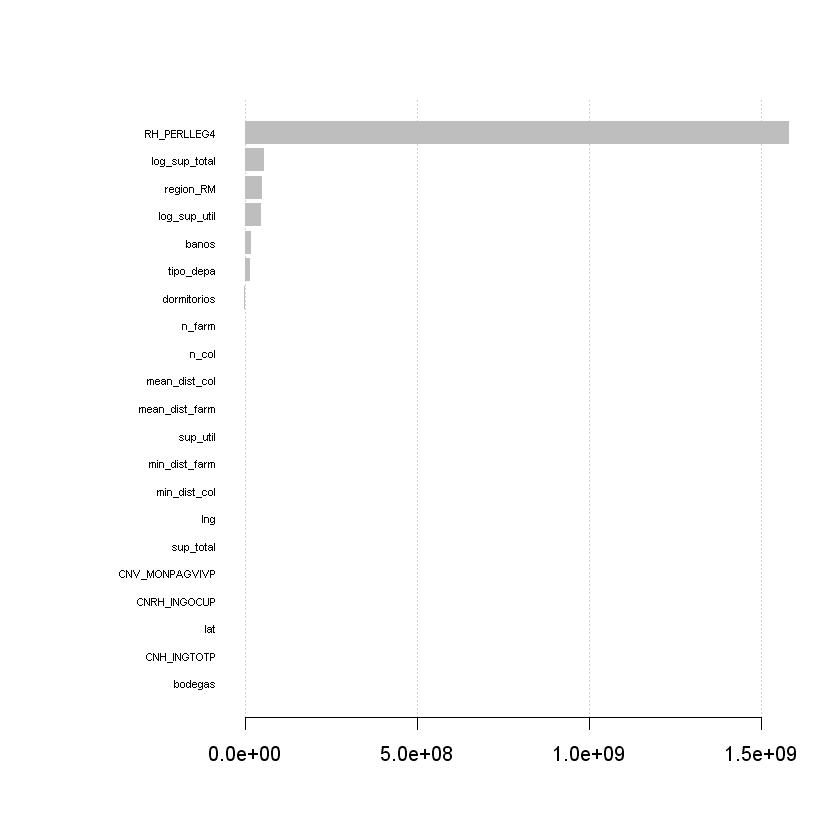

In [249]:
importance_matrix <- xgb.importance(model = bst)
print(importance_matrix)
xgb.plot.importance(importance_matrix = importance_matrix)

## 5. Evaluación del modelo

Elección de las métricas a utilizar para evaluar el rendimiento del modelo asi como la justificación de la elección de métricas utilizadas

In [ ]:
# Código aqui

## 6. Reflexiones finales

Reflexiones finales respecto al proceso de modelamiento, potenciales mejoras, bases adicionales interesantes que se podrían ocupar para generar nuevas variables, etc.

Existe una infinidad de mejoras, entre esas, se puede obtener datos extras de las comunas, distritos o localidades que describan la población y su comportamiento sociodemografico, en caso de que exista, se podría saber de que estrato es la vivienda y eso aportaría tambien; otras variables que tambien pueden ser de interes es si existen sitios de entretenimiento cerca, por ejemplo centros comerciales, museos, teatros, entre otras; ademas la accesibilidad que tiene al transporte, esto tambien puede ser una variable qeu influya en el precio, por ejemplo a cuantos metros esta la linea o estación mas cercana de metro o cuantas estaciones de bus se tienen en un radio de 500 metros, entre otras; las variables categoricas numericas se podrían agrupar para obetener mejores resultados, ya que vimos que algunos datos tienen pocas observaciones en esos valores o tambien que algunas por ejemplo la cantidad de baños a partir de cierto punto no agregaba valor a la vivienda.
En este caso no se tienen los datos completos de antiguedad, dato que uno esperaría que tuviese una relación inversa con respecto al precio de la vivienda, asi que tener menor cantidad de NA´s tambien aportaría bastante.
Teniendo mas tiempo sería bueno hacer un mejor tratamiento con los datos faltantes asi mismo con los outliers.
Por otro lado, probar mas modelos para ver si alguno tienen un mejor comportamiento.
Tambien sería bueno hacer pruebas o test con las variables para realizar las transformaciones correctas a estas dependiendo bien de sus distribuciones y de los supuetos de los modelos.
Como se tienen algunas variables que aparentemente no tienen ninguna relacion directa con el precio, sería bueno encontrar relaciones cruzadas, por ejemplo que en conjunto dos variables si tengan la relacion directa aunque separadas no.
Hacer validación cruzada 